In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout


In [4]:
data = pd.read_csv("phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [5]:
print(data.shape)
print(data.columns)

(11054, 32)
Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')


In [6]:
data = data.drop(['Index'],axis = 1)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


In [8]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["class"],axis =1)
y = data["class"]

In [33]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [30]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

((7737, 30), (3317, 30))

In [51]:
from sklearn.preprocessing import MinMaxScaler #bununla, 0-1 arasına scale ettik
scaler = MinMaxScaler(feature_range = (0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:

#Initialize RNN:
regressor = Sequential()

#Adding the first RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (X_train_scaled.shape[1],1)))
regressor.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))

#Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set
regressor.fit(X_train_scaled, y_train, epochs=100, batch_size=32)


Epoch 1/100
242/242 [==============================] - 23s 56ms/step - loss: 0.7062
Epoch 2/100
242/242 [==============================] - 7s 30ms/step - loss: 0.4186
Epoch 3/100
242/242 [==============================] - 11s 44ms/step - loss: 0.3405
Epoch 4/100
242/242 [==============================] - 7s 30ms/step - loss: 0.2999
Epoch 5/100
242/242 [==============================] - 11s 45ms/step - loss: 0.2914
Epoch 6/100
242/242 [==============================] - 7s 31ms/step - loss: 0.2663
Epoch 7/100
242/242 [==============================] - 11s 44ms/step - loss: 0.2590
Epoch 8/100
242/242 [==============================] - 7s 30ms/step - loss: 0.2505
Epoch 9/100
242/242 [==============================] - 11s 44ms/step - loss: 0.2483
Epoch 10/100
242/242 [==============================] - 7s 31ms/step - loss: 0.2361
Epoch 11/100
242/242 [==============================] - 12s 48ms/step - loss: 0.2288
Epoch 12/100
242/242 [==============================] - 8s 34ms/step - loss: 0.

In [53]:
#Model prediction
prediction = regressor.predict(np.array(X_test_scaled))

104/104 [==============================] - 2s 11ms/step


In [55]:
print(prediction[0:10])#predicted values
print(y_test[0:10])#

[[-0.98087305]
 [ 0.70019203]
 [ 0.98862493]
 [ 0.97509974]
 [ 0.6690011 ]
 [-0.95275265]
 [ 0.9834824 ]
 [ 0.98925567]
 [ 0.99213   ]
 [ 0.8060833 ]]
10581   -1
7533     1
10987    1
2992     1
8940     1
9054    -1
304      1
9644     1
5034     1
1470     1
Name: class, dtype: int64


In [59]:
pred = []
for p in prediction:
  if p < 0:
    pred.append(-1)
  else:
    pred.append(1)
print(pred[0:10])
print(y_test[0:10])

[-1, 1, 1, 1, 1, -1, 1, 1, 1, 1]
10581   -1
7533     1
10987    1
2992     1
8940     1
9054    -1
304      1
9644     1
5034     1
1470     1
Name: class, dtype: int64


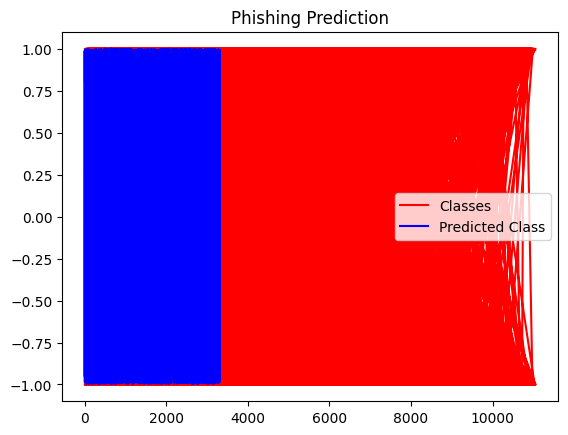

In [61]:
plt.plot(y_test, color='red', label='Classes')
plt.plot(prediction, color='blue', label='Predicted Class')
plt.title('Phishing Prediction')
plt.legend()
plt.show()

In [69]:
#model evaluation with mean square error and R-squared value
print(metrics.mean_squared_error(y_test,prediction))
print(metrics.r2_score(y_test,prediction))

0.1435273623994455
0.8542787172276316


In [ ]:
tf.__version__

: 

In [ ]:
import pickle
pckle.dump(regressor, )